In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 불러오기

In [19]:
data = pd.read_csv('datasets/한국5년치(전처리완).csv')

In [20]:
data1 = pd.read_csv('datasets/일본5년치(전처리완).csv')

In [21]:
df = pd.DataFrame(data)

In [22]:
df1 = pd.DataFrame(data1)

In [23]:
df['OT'] = pd.to_datetime(df['OT'])

In [24]:
df['OT_YY'] = df['OT'].dt.year 

In [25]:
count_by_year = df.groupby('OT_YY').size().reset_index(name='COUNT')

In [26]:
# 진도가 1인 항목들 제외
over2_df = df[df['SC'] != 1]

In [27]:
over2_df['OT_YY'] = over2_df['OT'].dt.year 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1596\2443908024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over2_df['OT_YY'] = over2_df['OT'].dt.year


In [28]:
count_by_year = over2_df.groupby('OT_YY').size().reset_index(name='COUNT')

# 한국 연도별 지진발생빈도

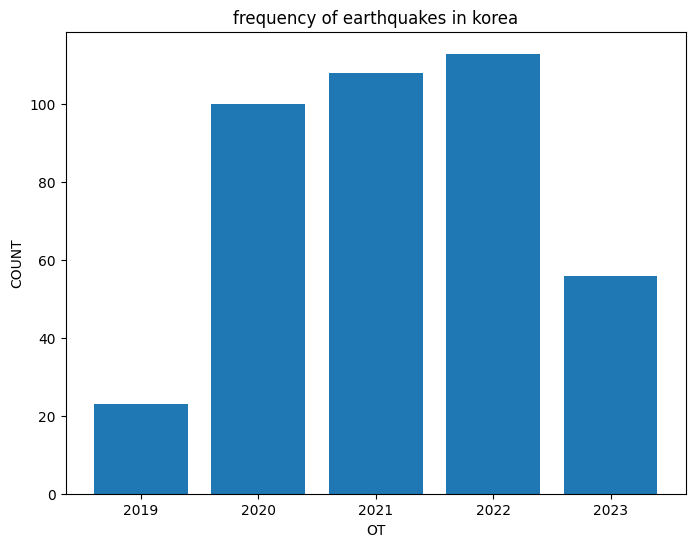

In [29]:
# 한국 연도별 지진발생빈도
plt.figure(figsize=(8, 6))
plt.bar(count_by_year['OT_YY'], count_by_year['COUNT'])
plt.xlabel('OT')
plt.ylabel('COUNT')
plt.title('frequency of earthquakes in korea')
plt.show()

In [30]:
# 진도가 5인 항목들만
df_5 = df[df['SC'] == 5]

In [31]:
df_5.sort_values(by='OT', inplace=True)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1596\176615367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.sort_values(by='OT', inplace=True)


In [32]:
df_5['Time_Gap'] = df_5['OT'].diff().dt.days

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1596\1502377935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['Time_Gap'] = df_5['OT'].diff().dt.days


# 한국 강진 발생주기

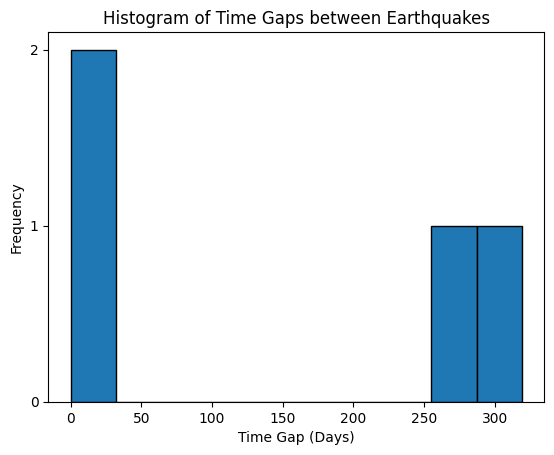

In [33]:
# 한국 강진 발생주기
plt.hist(df_5['Time_Gap'], bins=10, edgecolor='k')
plt.yticks(np.arange(0, 3, 1))
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Gaps between Earthquakes')
plt.show()

In [36]:
# 발생주기 일수 계산
mean_time_gap = df_5['Time_Gap'].mean()
median_time_gap = df_5['Time_Gap'].median()
std_deviation = df_5['Time_Gap'].std()

print(f"Mean Time Gap: {mean_time_gap} days")
print(f"Median Time Gap: {median_time_gap} days")
print(f"Standard Deviation of Time Gap: {std_deviation} days")

Mean Time Gap: 148.0 days
Median Time Gap: 136.5 days
Standard Deviation of Time Gap: 170.34670528073033 days


In [37]:
# 마지막 강진 날짜를 뽑아 다음 강진 예상
df_5.tail(1)

,OT,MT,DEP,SC,LAT,LON,SPOT,OT_YY,Time_Gap
108,2023-07-29,3.5,6.0,5,35.8,127.53,전북 장수군 북쪽 17km 지역,2023,270.0


In [38]:
df1['OT'] = pd.to_datetime(df1['OT'])

In [39]:
df1_5 = df1[df1['SC'] >= 5]

In [40]:
df1_5.sort_values(by='OT', inplace=True)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1596\297385009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_5.sort_values(by='OT', inplace=True)


In [41]:
df1_5['Time_Gap'] = df1_5['OT'].diff().dt.days

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1596\2956513081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_5['Time_Gap'] = df1_5['OT'].diff().dt.days


# 일본 강진 발생주기

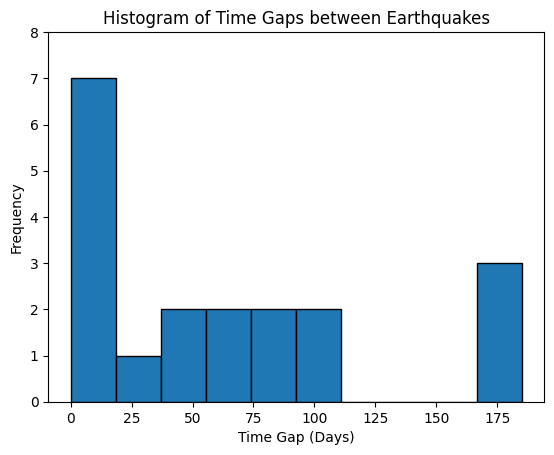

In [43]:
# 일본 강진 발생 주기
plt.hist(df1_5['Time_Gap'], bins=10, edgecolor='k')
plt.yticks(np.arange(0, 9, 1))
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Gaps between Earthquakes')
plt.show()

In [44]:
mean_time_gap = df1_5['Time_Gap'].mean()
median_time_gap = df1_5['Time_Gap'].median()
std_deviation = df1_5['Time_Gap'].std()

print(f"Mean Time Gap: {mean_time_gap} days")
print(f"Median Time Gap: {median_time_gap} days")
print(f"Standard Deviation of Time Gap: {std_deviation} days")

Mean Time Gap: 60.8421052631579 days
Median Time Gap: 44.0 days
Standard Deviation of Time Gap: 63.472008841951336 days


In [45]:
df1_5.tail(1)

,OT,MT,DEP,SC,LAT,LON,SPOT,Time_Gap
1506,2023-05-13,5.1,12.0,5.0,29.55,130.0,トカラ列島近海,2.0
